In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datos.csv")
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)
X_test


,x
26,3.532415
86,-0.570492
2,-3.602674
55,-3.602677
75,2.204725
93,5.313150
16,4.663357
73,4.738467
54,-3.768826
95,5.878571


In [4]:
# Variables importantes

iteraciones = 10000
alpha = 0.0000001 

## Algunos aspectos del código

`model.fit(X, y)`: es el comando central para entrenar cualquier modelo en scikit-learn. `model` corresponde al modelo pasado a la función, `fit()` toma los datos y encuentra los coeficientes que mejor ajustan los datos.

Para OLS calcula directamente la solución exacta usando álgebra lineal. Al final el modelo ya tiene los coeficientes b1, b2, b3... y b0.

Para SGD fit ejecuta un proceso iterativo:

1. Inicializa los coeficientes al azar (o a cero).
2. Toma cada mini lote de X, y.
3. Calcula el error entre la predición y el valor real.
4. Actualiza los coeficientes siguiendo el gradiente descendente.

Repite esto hasta `max_iter` o hasta cumplir la tolerancia (`tol`).

`model.predict(X)`: Genera las predicciones para los valores X.

`mean_squared_error(y, y_pred)`: Calcula el error cuadrático medio que mide qué tan lejos están las predicciones de los valores reales. Como los errores se elevan al cuadrado, penaliza mucho los errores grandes.

In [5]:
def fit_model(model, X, y, name="Modelo"):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{name} -> Coef: {model.coef_}, Intercept: {model.intercept_}, MSE: {mse}")
    
    return y_pred

In [6]:
def evaluar(X, y, modelo):
    predicciones = modelo.predict(X)
    mse = mean_squared_error(y, predicciones)
    r2 = r2_score(y, predicciones)
    
    return (predicciones, mse, r2)

## Regresión lineal y OLS

La regresión lineal trata de ajustar una línea (o plano) a los datos que predice y a partir de x.

OLS (Ordinary Least Squares, Mínimos Cuadrados Ordinarios) es el método clásico para **estimar los coeficientes** de la regresión lineal minimizando la suma de los errores al cuadrado. Muy estable y rápido para datasers pequeños o medianos. No aprende.

OLS Lineal -> Coef: [10.66323434], Intercept: -20.211696312048296, MSE: 863.5017184598263


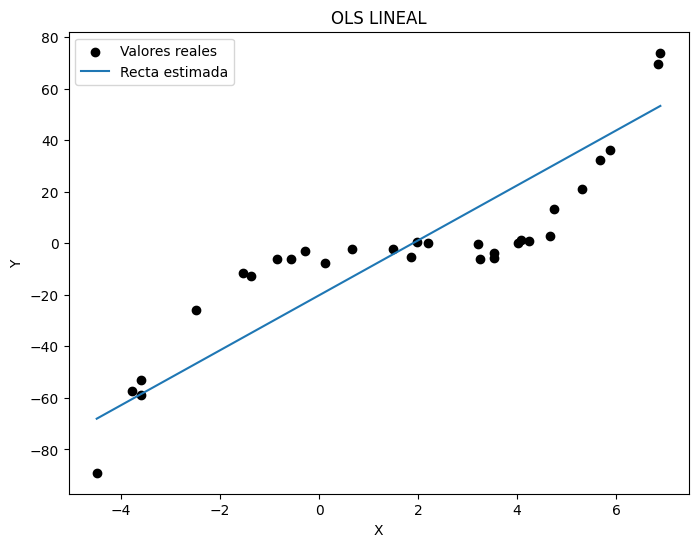

MSE: 296.0945867766399 --- R2: 0.7198048208163852


In [7]:
ols = LinearRegression()
fit_model(ols, X_train, y_train, "OLS Lineal")
predicciones, ols_lineal_mse, ols_lineal_r2 = evaluar(X_test, y_test, ols)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS LINEAL')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {ols_lineal_mse} --- R2: {ols_lineal_r2}')

## Regresión polinomial con OLS

La regresión polinomial extiende la regresión lineal para capturar curvaturas.

`poly2 = PolynomialFeatures(degree=2)`: Aquí se crea un transformador que se encarga de generar nuevas columnas con potencias del grado que se especifique. Solo se configura un objeto.

`X_poly2 = poly2.fit_transform(X_train)`: Aquí sucede la transformación. Primero aprende cómo están estructuradas las features (fit) y luego genera las nuevas columnas polinomiales (transform).

OLS Polinomio 2 -> Coef: [7.52755995 0.89999702], Intercept: -25.43603156581148, MSE: 756.6414024255187


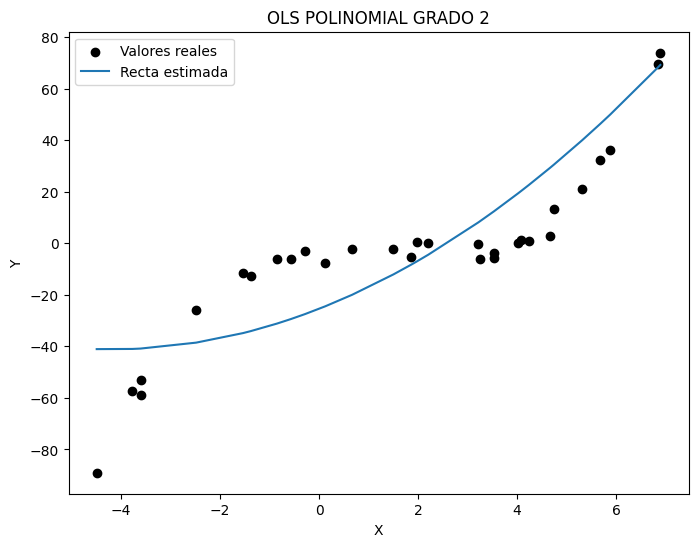

MSE: 352.4373840101116 --- R2: 0.6664874659184126


In [8]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
ols2 = LinearRegression()
fit_model(ols2, X_train_poly2, y_train, "OLS Polinomio 2")

predicciones, ols_poly2_mse, ols_poly2_r2 = evaluar(X_test_poly2, y_test, ols2)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS POLINOMIAL GRADO 2')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {ols_poly2_mse} --- R2: {ols_poly2_r2}')

OLS Polinomio 3 -> Coef: [ 0.9102488  -2.00399169  0.50530549], Intercept: -2.5120821464911747, MSE: 9.48057652010075


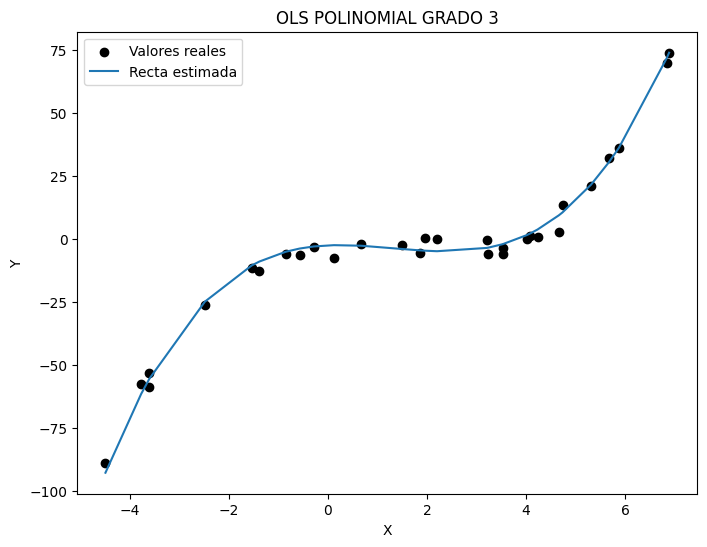

MSE: 8.487854131822667 --- R2: 0.9919679186464003


In [9]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
ols3 = LinearRegression()
fit_model(ols3, X_train_poly3, y_train, "OLS Polinomio 3")


predicciones, ols_poly3_mse, ols_poly3_r2 = evaluar(X_test_poly3, y_test, ols3)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS POLINOMIAL GRADO 3')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {ols_poly3_mse} --- R2: {ols_poly3_r2}')

## Regresión lineal y SGD

Stochastic Gradient Descent es un método iterativo para encontrar los coeficientesque minimizan la función de error. Actualiza los coeficientes paso a paso usando pequeños lotes de datos. Útil para datasets muy grandes.

Datos con valores muy grandes o muy pequeños provocan que las actualizaciones de los coeficientes sean enormes o prácticamente nulas. Si no se normalizan o estandarizan los datos, SGD se vuelve muy sensible a la escala de los features.

SGD Lineal -> Coef: [4.47777238], Intercept: [-0.20889731], MSE: 1243.2548865473918


c:\Users\Aleex\Downloads\pracml\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


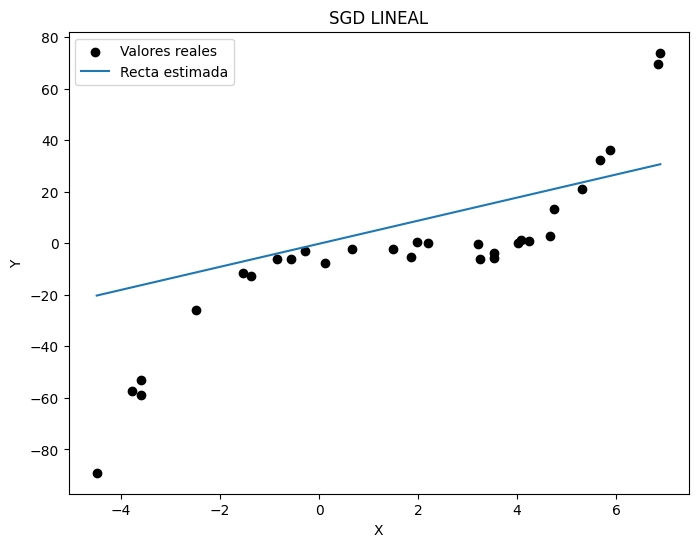

MSE: 554.9631368548045 --- R2: 0.47483674975580237


In [10]:
sgd = SGDRegressor(
    max_iter=iteraciones,
    learning_rate='constant',
    eta0=alpha,
    random_state=0
)
fit_model(sgd, X_train, y_train, "SGD Lineal")
predicciones, sgd_lineal_mse, sgd_lineal_r2 = evaluar(X_test, y_test, sgd)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('SGD LINEAL')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {sgd_lineal_mse} --- R2: {sgd_lineal_r2}')

SGD Polinomio 2 -> Coef: [1.91507976 0.91386849], Intercept: [-0.8663184], MSE: 1190.4910501462882


c:\Users\Aleex\Downloads\pracml\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


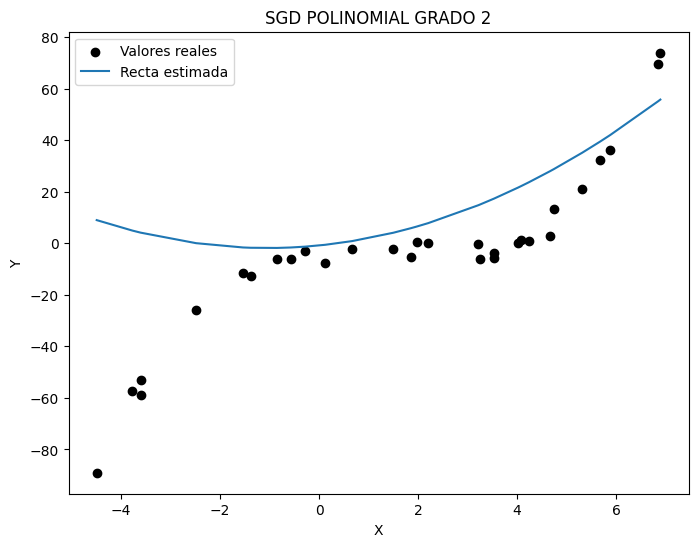

MSE: 892.1429511006203 --- R2: 0.1557624988611963


In [11]:
sgd2 = SGDRegressor(
    max_iter=iteraciones,
    learning_rate='constant',
    eta0=alpha,
    random_state=0
)
fit_model(sgd2, X_train_poly2, y_train, "SGD Polinomio 2")

predicciones, sgd_poly2_mse, sgd_poly2_r2 = evaluar(X_test_poly2, y_test, sgd2)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('SGD POLINOMIAL GRADO 2')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {sgd_poly2_mse} --- R2: {sgd_poly2_r2}')

SGD Polinomio 3 -> Coef: [-0.04428758 -1.96934002  0.51333375], Intercept: [-0.1446037], MSE: 14.937072786367061


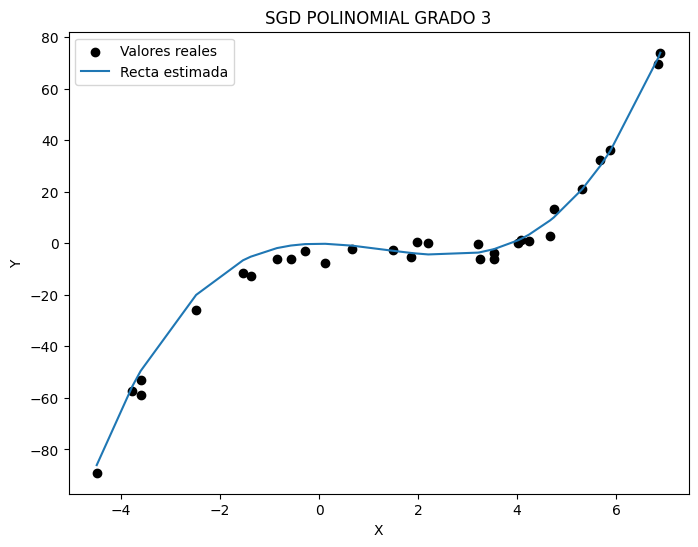

MSE: 16.070592976544564 --- R2: 0.9847923505536876


In [12]:
sgd3 = SGDRegressor(
    max_iter=iteraciones,
    learning_rate='constant',
    eta0=alpha,
    random_state=0
)
fit_model(sgd3, X_train_poly3, y_train, "SGD Polinomio 3")

predicciones, sgd_poly3_mse, sgd_poly3_r2 = evaluar(X_test_poly3, y_test, sgd3)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="black", label="Valores reales")
X_sorted, y_sorted = zip(*sorted(zip(X_test.values, predicciones)))
plt.plot(X_sorted, y_sorted, label="Recta estimada")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('SGD POLINOMIAL GRADO 3')
plt.legend() # Se usa para mostrar una leyenda en la gráfica. La leyenda es una caja con etiquetas que indica qué representa cada línea o marcador.
plt.show()

print(f'MSE: {sgd_poly3_mse} --- R2: {sgd_poly3_r2}')

In [13]:
print("                                     \tMSE\t\t\tR2")
print(f"Regresión lineal con OLS            \t{ols_lineal_mse}\t{ols_lineal_r2}")
print(f"Regresión polinomial grado 2 con OLS\t{ols_poly2_mse}\t{ols_poly2_r2}")
print(f"Regresión polinomial grado 3 con OLS\t{ols_poly3_mse}\t{ols_poly3_r2}")
print(f"Regresión lineal con SGD            \t{sgd_lineal_mse}\t{sgd_lineal_r2}")
print(f"Regresión polinomial grado 2 con SGD\t{sgd_poly2_mse}\t{sgd_poly2_r2}")
print(f"Regresión polinomial grado 3 con SGD\t{sgd_poly3_mse}\t{sgd_poly3_r2}")

                                     	MSE			R2
Regresión lineal con OLS            	296.0945867766399	0.7198048208163852
Regresión polinomial grado 2 con OLS	352.4373840101116	0.6664874659184126
Regresión polinomial grado 3 con OLS	8.487854131822667	0.9919679186464003
Regresión lineal con SGD            	554.9631368548045	0.47483674975580237
Regresión polinomial grado 2 con SGD	892.1429511006203	0.1557624988611963
Regresión polinomial grado 3 con SGD	16.070592976544564	0.9847923505536876
